In [46]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [47]:
#Reading the dataset into the notebook
cars_df = pd.read_csv('USA_cars_datasets.csv')

In [48]:
cars_df.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [49]:
cars_df.drop(columns='Unnamed: 0', axis=1, inplace=True);

In [50]:
cars_df.head(30)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [51]:
#Checking for duplicates
cars_df.loc[cars_df.duplicated()]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition


In [52]:
#Checking for missing values
cars_df.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

## Exploratory Analysis

In [53]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [54]:
cars_df.nunique()

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [55]:
#Getting the descriptive statistics of the numerical features
cars_df.describe(exclude='object')

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [56]:
# Descriptive statistics for categorical features
cars_df.describe(exclude=['int64','float64'])

,brand,model,title_status,color,vin,state,country,condition
count,2499,2499,2499,2499,2499,2499,2499,2499
unique,28,127,2,49,2495,44,2,47
top,ford,door,clean vehicle,white,1gnevhkw8jj148388,pennsylvania,usa,2 days left
freq,1235,651,2336,707,2,299,2492,832


## Creating Visualizations

### Univariate analysis

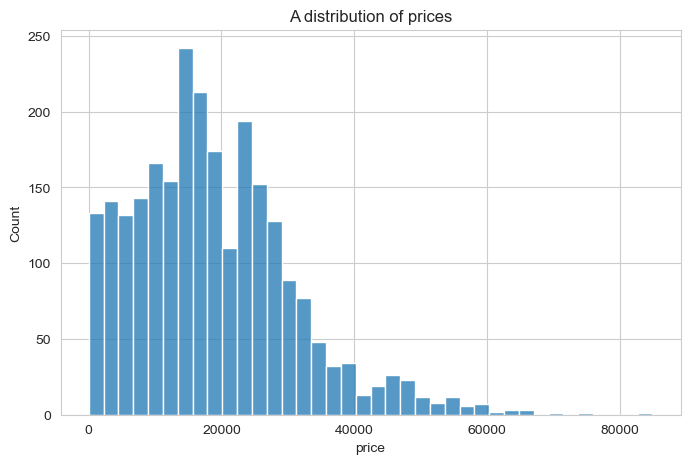

In [57]:
#Distribution of prices
plt.figure(figsize=(8,5))
sns.histplot(cars_df['price']).set(title='A distribution of prices');

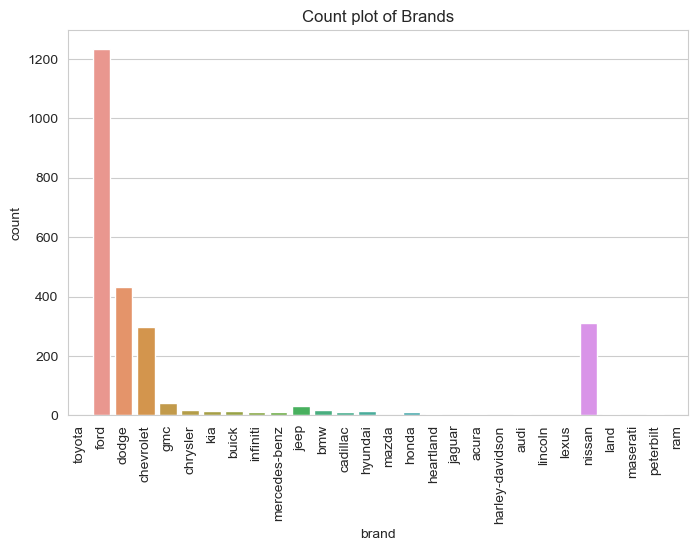

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(cars_df, x ='brand').set(title='Count plot of Brands')
plt.xticks(rotation=90);

### Most cars in the dataset are cars from ford

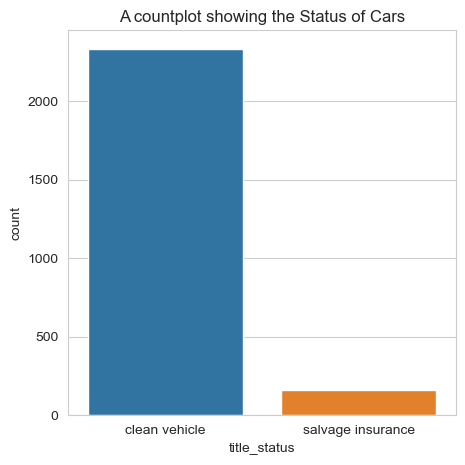

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(cars_df, x ='title_status').set(title='A countplot showing the Status of Cars');

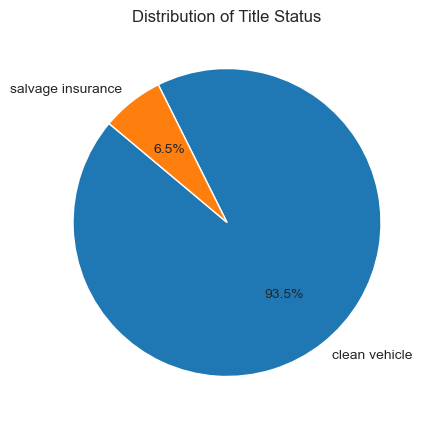

In [60]:
plt.figure(figsize=(5, 5))
plt.pie(cars_df['title_status'].value_counts(), labels=cars_df['title_status'].unique(), autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Title Status');

### Bivariate Analysis

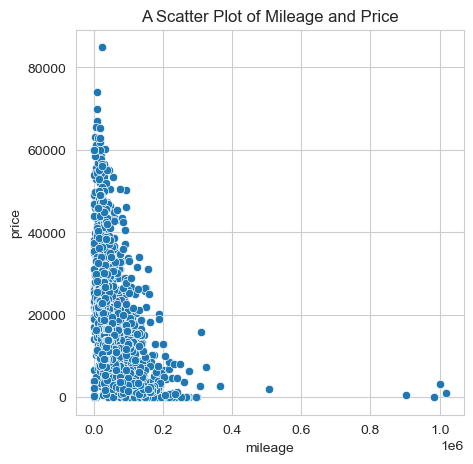

In [61]:
plt.figure(figsize=(5,5))
sns.scatterplot(cars_df, x='mileage', y='price').set(title='A Scatter Plot of Mileage and Price');

From the graph above, we can see that as the mileage of a car increases, the price of the car tends to decrease
And also we can say that most cars in the dataset has mileage between 0.0 and 2.2

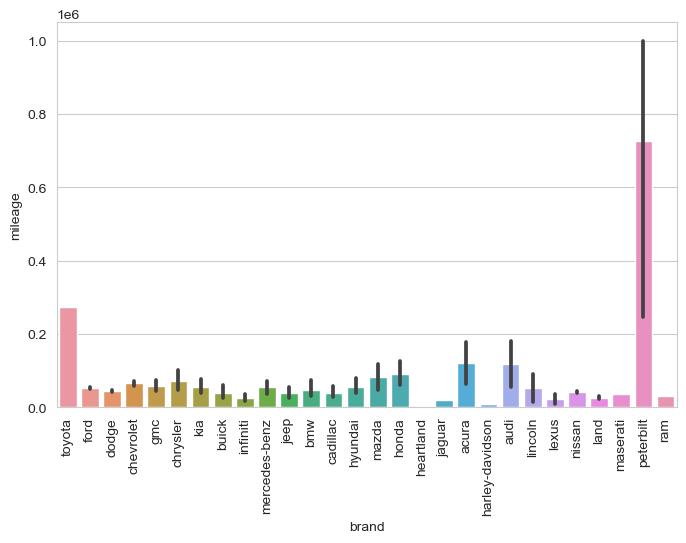

In [62]:
#Visualizing Brands and their mileage
plt.figure(figsize=(8,5))
sns.barplot(cars_df, x ='brand', y='mileage')
plt.xticks(rotation=90);

From the graphs Below and Above, a car like peterbilt had a higher mileage and the price of the car was really low as compared
to others with lower mileage

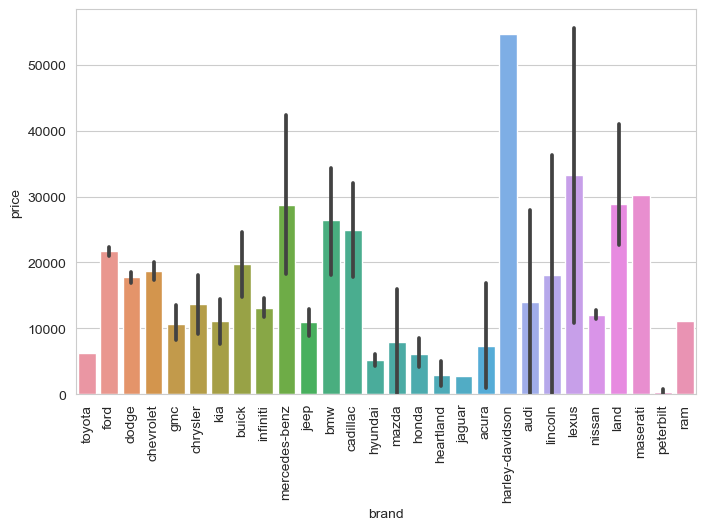

In [63]:
# Visualizing brands and the price
plt.figure(figsize=(8,5))
sns.barplot(cars_df, x ='brand', y='price')
plt.xticks(rotation=90);

# Preparing Data for The Model

In [64]:
#Dropping Columns that will not be needed for the prediction
cars_df.drop(columns=['model','color','vin', 'lot', 'state'], axis=1, inplace=True)

In [65]:
# Changing the year column to a vehicle age column
current_year = datetime.datetime.now().year
cars_df['vehicle_age'] = current_year-cars_df['year']
cars_df.drop('year', axis =1, inplace=True)

In [66]:
# Function to extract hours from "condition" column
def extract_hours(condition_string):
    if 'days' in condition_string:
        days = int(condition_string.split()[0])
        return days * 24
    elif 'hours' in condition_string:
        return int(condition_string.split()[0])
    else:
        return 0

In [67]:
# Applying the function to the condition to create a new column called hours_left
cars_df['hours_left'] = cars_df['condition'].apply(extract_hours)

#Dropping the condition column
cars_df.drop('condition', axis=1, inplace=True)

In [68]:
#Encoding some features for the model using label Encoder
le = LabelEncoder()
cars_df['title_status'] = le.fit_transform(cars_df['title_status'].values)
cars_df['country'] = le.fit_transform(cars_df['country'].values)

In [69]:
#Checking the head of the dataframe
cars_df.head()

,price,brand,title_status,mileage,country,vehicle_age,hours_left
0,6300,toyota,0,274117.0,1,15,240
1,2899,ford,0,190552.0,1,12,144
2,5350,dodge,0,39590.0,1,5,48
3,25000,ford,0,64146.0,1,9,22
4,27700,chevrolet,0,6654.0,1,5,22


In [70]:
#Encoding the brand column with One Hot Encoder
encoder = OneHotEncoder(sparse=False)
brand_encoded = encoder.fit_transform(cars_df[['brand']])

# Create a DataFrame with the encoded features
brand_encoded_df = pd.DataFrame(brand_encoded, columns=encoder.get_feature_names_out(['brand']))
# Concatenate the one-hot encoded columns to the original DataFrame
cars_df = pd.concat([cars_df, brand_encoded_df], axis=1)
# Dropping the original brand from the dataset
cars_df.drop('brand', axis=1, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
cars_df.head()

,price,title_status,mileage,country,vehicle_age,hours_left,brand_acura,brand_audi,brand_bmw,brand_buick,...,brand_land,brand_lexus,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram,brand_toyota
0,6300,0,274117.0,1,15,240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2899,0,190552.0,1,12,144,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5350,0,39590.0,1,5,48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25000,0,64146.0,1,9,22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27700,0,6654.0,1,5,22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training, Testing and Evaluation of model

In [72]:
# Splitting data into training and testing
X = cars_df.drop('price', axis=1)
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [73]:
#fitting model on training set with their default parameters
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor()

In [74]:
# Fitting models on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
svr.fit(X_train, y_train)

SVR()

In [76]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
# predicting and evaluating models
lr_pred = lr.predict(X_train)

In [78]:
mean_squared_error(lr_pred, y_train)

94942739.4690763

In [79]:
svr_pred = svr.predict(X_train)

In [80]:
mean_squared_error(svr_pred, y_train)

150690453.3108001

In [81]:
rf_pred = rf.predict(X_train)

In [82]:
mean_squared_error(rf_pred, y_train)

12275386.59507337

## Using GridSearchCV to get the best parameters for each model

In [87]:
param_svr = {
    'kernel': ['linear', 'rbf']
}
grid_search_svr = GridSearchCV(SVR(), param_svr, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(), param_grid={'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [89]:
svr = grid_search_svr.best_estimator_

In [92]:
# making prediction with the tuned model
pred = svr.predict(X_test)
mean_squared_error(y_test, pred)

114066154.89692779

In [86]:
param_rf = {
    'n_estimators': [10, 20, 30]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_rf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [93]:
rf = grid_search.best_estimator_

In [94]:
# making prediction with the tuned model
pred = rf.predict(X_test)
mean_squared_error(y_test, pred)

86887116.35170223